<a href="https://colab.research.google.com/github/NightRoadIx/RecuperaPiton/blob/Alumnos/acordeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
  Obtener datos directamente de una página web realizando ciertos
  pasos

  CSV Comma Separated Values

  Columna1,Columna2,Columna3
  DatoC1,DatoC2,DatoC3

'''
# Las librerías que se tienen que importar
import requests                   # Realizar pedidos por medio de la www
import urllib.request             # hacer pedidos utilizando URL
import time
from bs4 import BeautifulSoup     # Manejar páginas web con hipertexto

import pandas                     # Manejo de grandes cantidades de datos
import numpy as np                # Manejo de datos numéricos
import matplotlib.pyplot as mp    # Manejo de gráficas

In [2]:
### WEBSCRAPPING
# Requerir de una URL
url = 'https://ourworldindata.org/coronavirus/country/mexico?country=~MEX'

# Solicitar por medio de la web la respuesta del sitio
respuesta = requests.get(url)
# Ver la respuesta
print(respuesta)

<Response [200]>


In [3]:
# Ahora se arreglarán estos datos con las funciones de BeautifulSoup
# parser -> Analizador sintáctico 
sopa = BeautifulSoup(respuesta.text, "html.parser")
# Esto va a mostrar el código fuente de la página
print(sopa.prettify())

<!DOCTYPE doctype html>
<html>
 <head>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Mexico: Coronavirus Pandemic Country Profile - Our World in Data
  </title>
  <meta content="Mexico: What has been the impact of the Coronavirus Pandemic (COVID-19)?" name="description"/>
  <link href="https://ourworldindata.org/coronavirus/country/mexico" rel="canonical"/>
  <link href="/atom.xml" rel="alternate" type="application/atom+xml"/>
  <link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <meta content="1149943818390250" property="fb:app_id"/>
  <meta content="https://ourworldindata.org/coronavirus/country/mexico" property="og:url"/>
  <meta content="Mexico: Coronavirus Pandemic Country Profile" property="og:title"/>
  <meta content="Mexico: What has been the impact of the Coronavirus Pandemic (COVID-19)?" property="og:description"/>
  <meta content="https://ourworldindata.org/app/uploads/2020/05/Coronavirus-entry-banner-on-OWID-b

In [4]:
# Encontrar y mostrar todas las etiquetas que inicien con <a ...>
sopa.findAll('a')

[<a href="/">Our World<br/> in Data</a>,
 <a class="topics-button" href="/#entries"><div class="label">Articles <br/><strong>by topic</strong></div><div class="icon"><svg height="6" width="12"><path d="M0,0 L12,0 L6,6 Z" fill="currentColor"></path></svg></div></a>,
 <a data-track-note="header-navigation" href="/blog">Latest</a>,
 <a data-track-note="header-navigation" href="/about">About</a>,
 <a data-track-note="header-navigation" href="/donate">Donate</a>,
 <a data-track-note="header-navigation" href="/charts">All charts</a>,
 <a data-track-note="header-navigation" href="https://sdg-tracker.org">Sustainable Development Goals Tracker</a>,
 <a class="oxford-logo" href="https://www.oxfordmartin.ox.ac.uk/global-development"><img alt="Oxford Martin School logo" src="https://ourworldindata.org/oms-logo.svg"/></a>,
 <a class="gcdl-logo" href="https://global-change-data-lab.org/"><img alt="Global Change Data Lab logo" src="https://ourworldindata.org/gcdl-logo-narrow.png"/></a>,
 <a data-trac

In [8]:
# Generar una lista para guardar los enlaces
listaEnlaces = []
# Recorrer entonces la lista con las etiquetas <a ...>
for enlace in sopa.findAll('a'):
  # De esas etiquetas obtener (get) a lo que este apuntando
  # 'href'
  tmp = enlace.get('href')
  # Localizar los archivos csv
  if "csv" in tmp:
    print(tmp)
    listaEnlaces.append(tmp)

https://covid.ourworldindata.org/data/owid-covid-data.csv


In [10]:
listaEnlaces

['https://covid.ourworldindata.org/data/owid-covid-data.csv']

In [11]:
### ANÁLISIS DEL ARCHIVO

# 1.- Descargar los datos únicamente
df = pandas.read_csv(listaEnlaces[0])

In [12]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [13]:
# Guardar el archivo directamente de la URL
nombreArchivo = 'Fulanito.csv'
urllib.request.urlretrieve(listaEnlaces[0], nombreArchivo)
# df = pandas.read_csv(nombreArchivo)

('Fulanito.csv', <http.client.HTTPMessage at 0x7f3d4ce27048>)

In [16]:
# conocer encabezados
listaEncabezados = list(df.columns)
print(listaEncabezados)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']


In [20]:
# Hallar datos de una sola columna
listaPaises = df["location"].unique().tolist()
print(listaPaises)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',

In [21]:
# Hallar los datos de México
datosMexico = df[df["location"] == "Mexico"]

In [22]:
datosMexico.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25816,MEX,North America,Mexico,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
25817,MEX,North America,Mexico,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
25818,MEX,North America,Mexico,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,16.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
25819,MEX,North America,Mexico,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,18.0,38.0,0.0,0.0,NaN,NaN,NaN,NaN,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
25820,MEX,North America,Mexico,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,6.0,44.0,0.0,0.0,NaN,NaN,NaN,NaN,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774


In [23]:
# Guardar esos datos
datosMexico.to_csv("Mexicalpan.csv")

In [25]:
linea1 = datosMexico.head(1)

In [27]:
linea1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25816,MEX,North America,Mexico,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774


In [30]:
linea1a = datosMexico.iloc[5]

In [31]:
linea1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25816,MEX,North America,Mexico,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774


In [32]:
# GRAFICACIÓN
fechas = datosMexico['date'].tolist()

In [33]:
fechas

['2019-12-31',
 '2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-05',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-11',
 '2020-01-12',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-18',
 '2020-01-19',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-

In [34]:
totalCasos = datosMexico['total_cases']

In [35]:
totalCasos = datosMexico['total_cases'].fillna(0).tolist()
totalCasos

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 4.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 0.0,
 0.0,
 11.0,
 16.0,
 26.0,
 41.0,
 53.0,
 82.0,
 93.0,
 118.0,
 164.0,
 203.0,
 251.0,
 316.0,
 367.0,
 405.0,
 475.0,
 585.0,
 717.0,
 848.0,
 993.0,
 1094.0,
 1215.0,
 1378.0,
 1510.0,
 1688.0,
 1890.0,
 2143.0,
 2439.0,
 2785.0,
 3181.0,
 3441.0,
 3844.0,
 4219.0,
 4661.0,
 5014.0,
 5399.0,
 5847.0,
 6297.0,
 6875.0,
 7497.0,
 8261.0,
 8772.0,
 9501.0,
 10544.0,
 11633.0,
 12872.0,
 13842.0,
 14677.0,
 15529.0,
 16752.0,
 17799.0,
 19224.0,
 20739.0,
 22088.0,
 23471.0,
 24905.0,
 26025.0,
 27634.0,
 29616.0,
 31522.0,
 33460.0,
 35022.0,
 36327.0,
 38324.0,
 40186

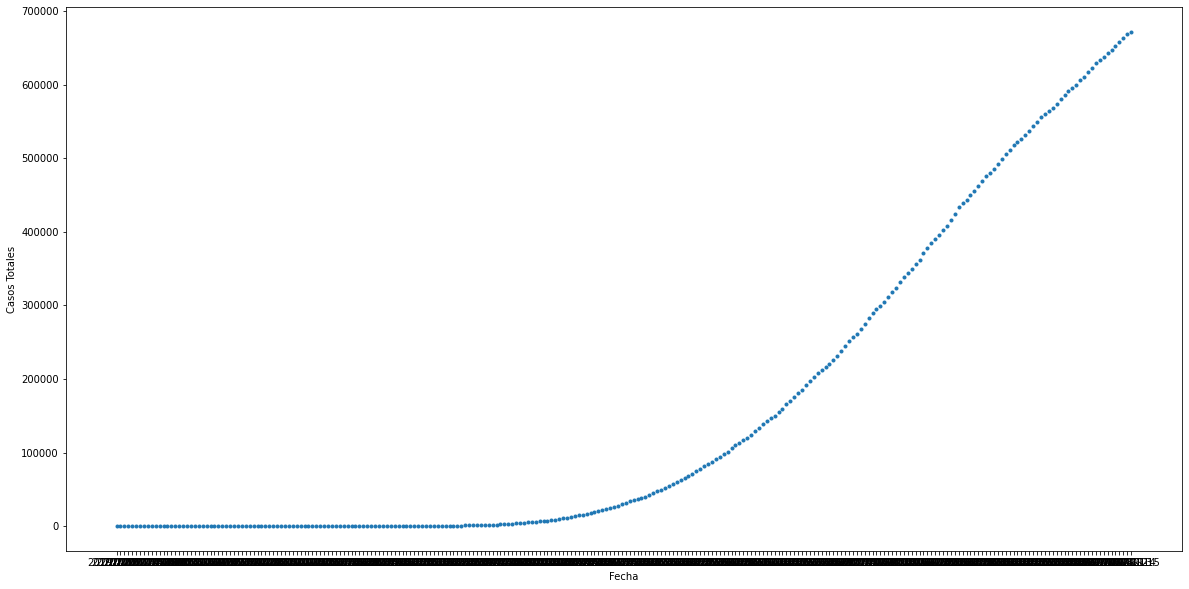

In [36]:
# Graficar fecha - total casos
# Cambiar el tamaño de la gráfica
fig = mp.figure(figsize=(20,10))
# Graficar
mp.plot(fechas, totalCasos, '.')
mp.xlabel('Fecha')
mp.ylabel('Casos Totales')
# Mostrar la gráfica
mp.show()